# Setup and Imports
This section includes all necessary libraries for data analysis, visualization, and model development.


In [1]:
import requests
import logging
import pandas as pd
import numpy as np
import time
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200) # Ensuring all columns are displayed


# Data Loading and Initial Inspection
In this section, we load the gold prices data from a CSV file, inspect the first few rows, and check for data types and missing values.


In [2]:
df = pd.read_csv('future-gc00-daily-prices.csv', parse_dates=['Date'], index_col='Date').copy()
df = df.sort_index()


In [3]:
df.head()

,Open,High,Low,Close
Date,,,,
2009-04-24,905.50,915.40,904.20,914.10
2009-04-27,915.00,919.70,905.80,908.20
2009-04-28,907.20,907.70,884.60,893.60
2009-04-29,894.00,904.00,888.30,900.50
2009-04-30,898.60,900.80,880.10,891.20


In [126]:
df

,Close,diff,seasonal_diff,seasonal_diff_2
Date,,,,
2015-01-02,1186.2,NaN,NaN,NaN
2015-01-05,1204.0,17.8,NaN,NaN
2015-01-06,1219.4,15.4,NaN,NaN
2015-01-07,1210.7,-8.7,NaN,NaN
2015-01-08,1208.5,-2.2,NaN,NaN
...,...,...,...,...
2024-02-02,2053.7,-17.4,117.1,302.4
2024-02-05,2042.9,-10.8,123.1,350.8
2024-02-06,2051.4,8.5,160.5,384.0


In [4]:
df[['Open', 'High', 'Low', 'Close']] = df[['Open', 'High', 'Low', 'Close']].replace({',': ''}, regex=True).astype(float)


In [5]:
df.head()

,Open,High,Low,Close
Date,,,,
2009-04-24,905.5,915.4,904.2,914.1
2009-04-27,915.0,919.7,905.8,908.2
2009-04-28,907.2,907.7,884.6,893.6
2009-04-29,894.0,904.0,888.3,900.5
2009-04-30,898.6,900.8,880.1,891.2


In [6]:
df.dtypes

Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3724 entries, 2009-04-24 to 2024-02-08
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3724 non-null   float64
 1   High    3724 non-null   float64
 2   Low     3724 non-null   float64
 3   Close   3724 non-null   float64
dtypes: float64(4)
memory usage: 145.5 KB


In [8]:
df.describe()

,Open,High,Low,Close
count,3724.000000,3724.000000,3724.000000,3724.000000
mean,1468.704699,1479.170677,1457.587621,1468.537997
std,290.228492,292.382254,287.619059,289.872175
min,887.500000,890.800000,880.100000,888.200000
25%,1239.500000,1247.700000,1231.000000,1239.775000
50%,1353.550000,1363.250000,1342.050000,1353.750000
75%,1736.125000,1750.600000,1722.700000,1735.775000
max,2094.400000,2152.300000,2074.600000,2093.100000


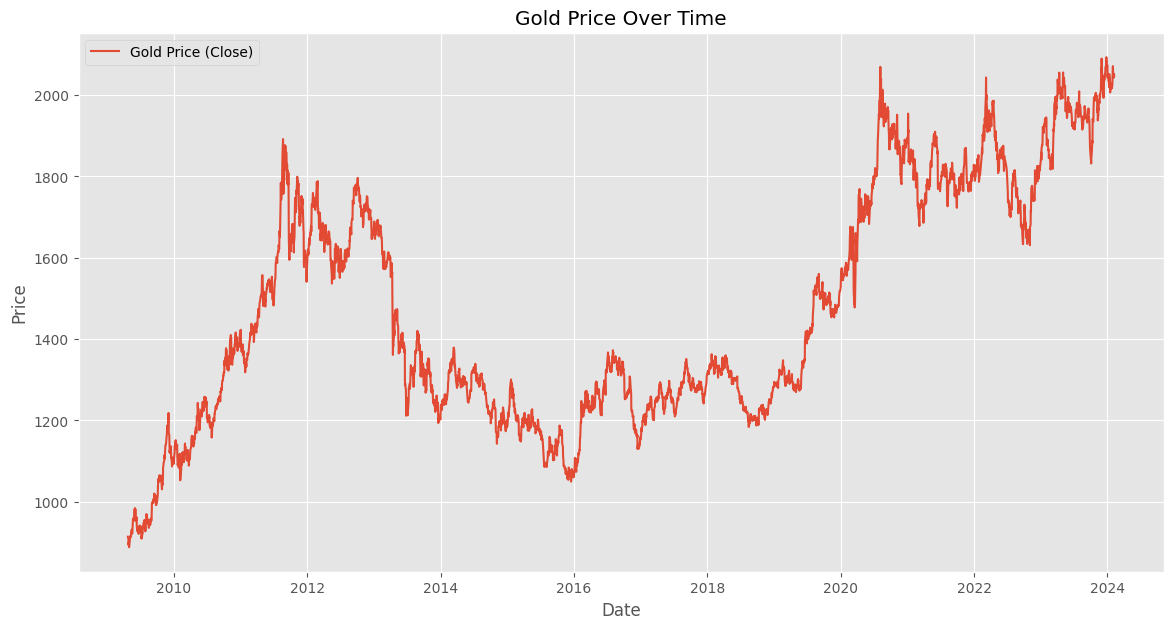

In [9]:
# Plotting the gold price over time
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Gold Price (Close)')
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

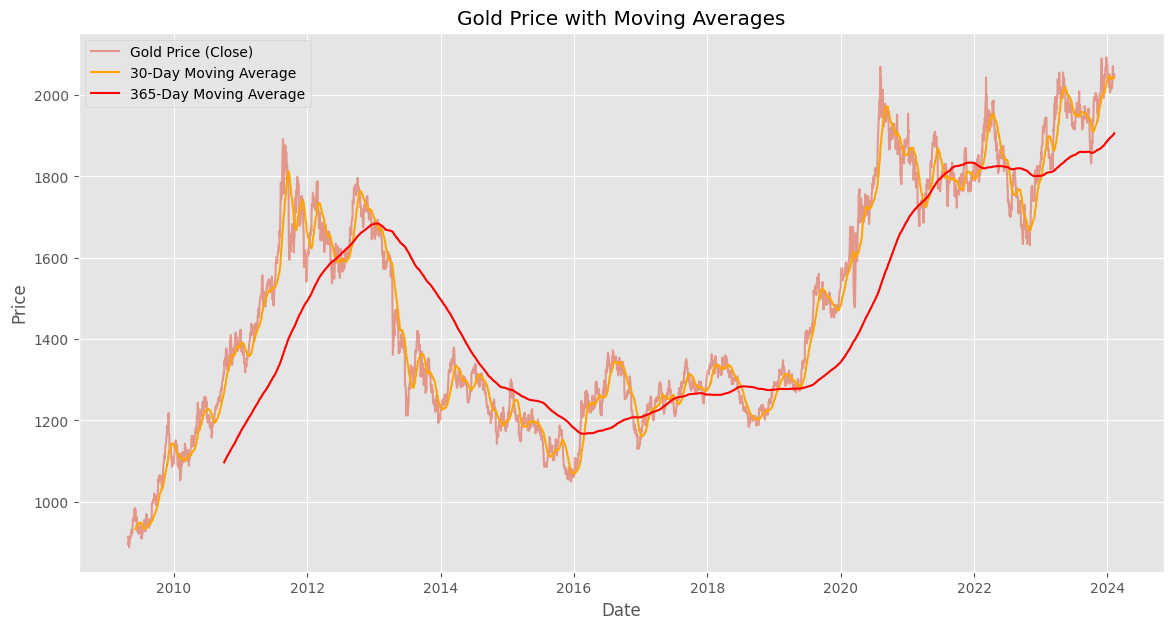

In [10]:
# Plotting moving averages to observe trends
df['Moving_Avg_30'] = df['Close'].rolling(window=30).mean()
df['Moving_Avg_365'] = df['Close'].rolling(window=365).mean()

plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Gold Price (Close)', alpha=0.5)
plt.plot(df['Moving_Avg_30'], label='30-Day Moving Average', color='orange')
plt.plot(df['Moving_Avg_365'], label='365-Day Moving Average', color='red')
plt.title('Gold Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Insight from Plot:
The chart illustrates the overall increasing trend in gold prices over the past decade, with significant volatility in recent years. This trend could be influenced by various economic factors, including market demand, global economic conditions, and geopolitical events.

In [11]:
start_date = pd.to_datetime('2015-01-01')
df = df[start_date:]
df.head()

,Open,High,Low,Close,Moving_Avg_30,Moving_Avg_365
Date,,,,,,
2015-01-02,1184.0,1194.9,1167.3,1186.2,1198.076667,1277.772877
2015-01-05,1187.8,1207.5,1177.8,1204.0,1198.413333,1277.456438
2015-01-06,1204.0,1223.3,1201.6,1219.4,1199.363333,1277.156712
2015-01-07,1219.0,1219.4,1209.1,1210.7,1199.796667,1276.853151
2015-01-08,1211.0,1216.8,1204.2,1208.5,1200.223333,1276.524658


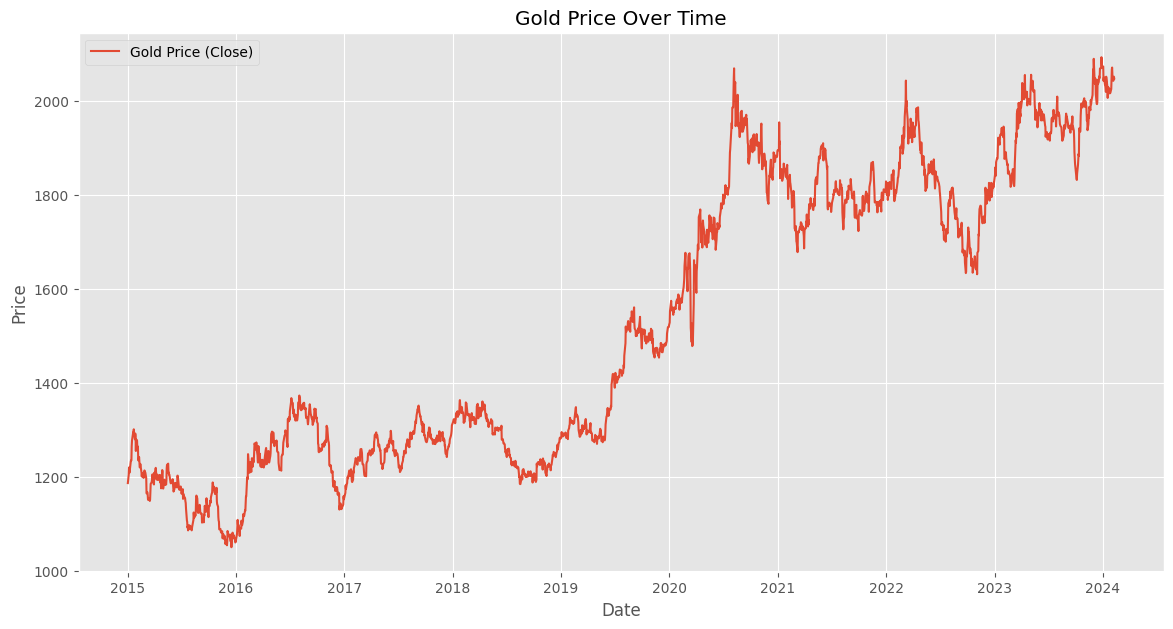

In [12]:
# Plotting the gold price over time
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Gold Price (Close)')
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

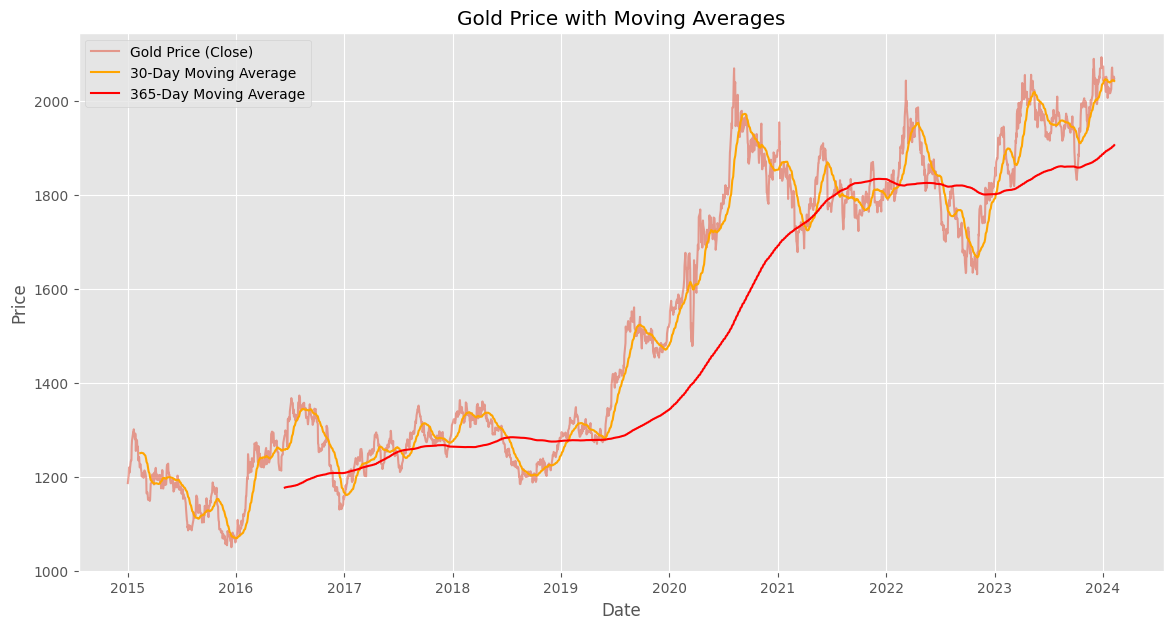

In [13]:
# Plotting moving averages to observe trends
df['Moving_Avg_30'] = df['Close'].rolling(window=30).mean()
df['Moving_Avg_365'] = df['Close'].rolling(window=365).mean()

plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Gold Price (Close)', alpha=0.5)
plt.plot(df['Moving_Avg_30'], label='30-Day Moving Average', color='orange')
plt.plot(df['Moving_Avg_365'], label='365-Day Moving Average', color='red')
plt.title('Gold Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Time Series Analysis and Stationarity Checks
We use the Augmented Dickey-Fuller (ADF) test to check if the time series is stationary. If needed, we apply differencing to make the series stationary.


In [14]:
from statsmodels.tsa.stattools import adfuller

# Performing the ADF test
adf_result = adfuller(df['Close'].dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

# Interpretation
if adf_result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is non-stationary.")


ADF Statistic: -0.5615822802007236
p-value: 0.8794287401386105
The series is non-stationary.


## Additive Decomposition

Observerd = Trend + Seasonality + Residual

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

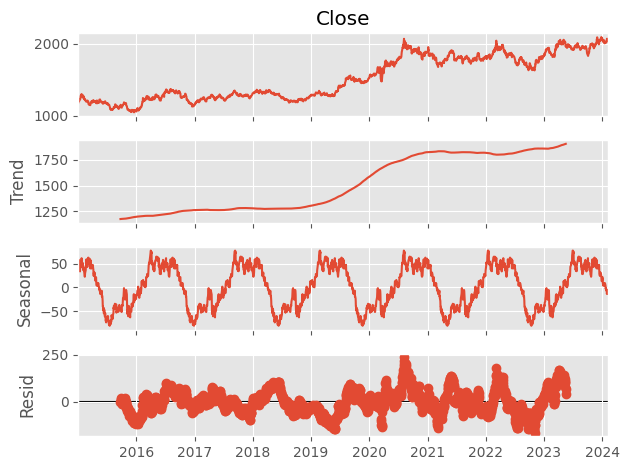

In [16]:
decomposition_add = seasonal_decompose(df['Close'], model='additive', period=365)
decomposition_add.plot()
plt.show()

In [17]:
## Extract the Components
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed_add = pd.concat([decomposition_add.seasonal, decomposition_add.trend, decomposition_add.resid, decomposition_add.observed], axis=1)
df_reconstructed_add.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed_add.tail(100)

,seas,trend,resid,actual_values
Date,,,,
2023-09-18,58.541333,NaN,NaN,1953.4
2023-09-19,50.180457,NaN,NaN,1953.7
2023-09-20,46.241607,NaN,NaN,1967.1
2023-09-21,41.584073,NaN,NaN,1939.6
2023-09-22,42.514594,NaN,NaN,1945.6
...,...,...,...,...
2024-02-02,-11.011653,NaN,NaN,2053.7
2024-02-05,-13.194667,NaN,NaN,2042.9
2024-02-06,-13.483872,NaN,NaN,2051.4


In [18]:
df_reconstructed_add.describe()

,seas,trend,resid,actual_values
count,2291.000000,1927.000000,1927.000000,2291.000000
mean,1.426117,1517.561703,-0.421826,1525.673243
std,43.489931,265.272963,62.472259,304.885428
min,-81.292639,1176.515890,-165.327635,1049.600000
25%,-39.407397,1271.312466,-40.239352,1254.300000
50%,3.339415,1416.948767,-2.919799,1423.300000
75%,43.955580,1817.841918,38.638991,1817.450000
max,78.333552,1905.876438,237.186667,2093.100000


## Multiplicative Decomposition

Observed = Trend × Seasonality × Residual

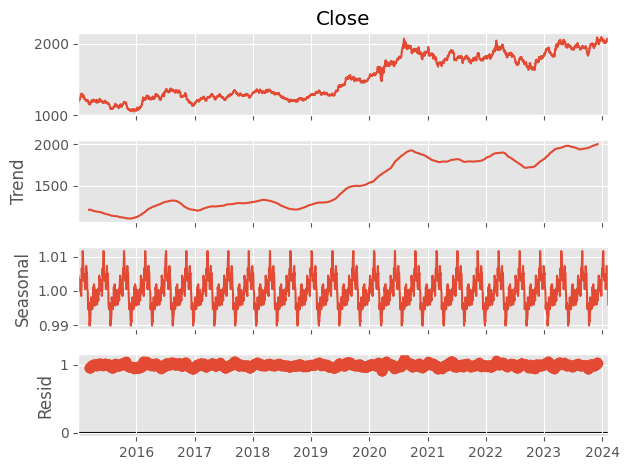

In [19]:
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=90)
decomposition.plot()
plt.show()

Conclussion: Multiplicative model is a better suit since the residuals are more stable and random. Indicating the model has sccessfully extracted the trend and seasonal components, leaving only random noise. 

In [20]:
## Extract the Components
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([decomposition.seasonal, decomposition.trend, decomposition.resid, decomposition.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head(100)

,seas,trend,resid,actual_values
Date,,,,
2015-01-02,1.004486,NaN,NaN,1186.2
2015-01-05,1.003752,NaN,NaN,1204.0
2015-01-06,1.003265,NaN,NaN,1219.4
2015-01-07,1.002489,NaN,NaN,1210.7
2015-01-08,1.003298,NaN,NaN,1208.5
...,...,...,...,...
2015-05-20,1.000621,1182.011667,1.021944,1208.7
2015-05-21,1.002135,1181.358333,1.017079,1204.1
2015-05-22,1.003119,1180.648889,1.016608,1204.0


In [21]:
df_reconstructed.describe()

,seas,trend,resid,actual_values
count,2291.000000,2201.000000,2201.000000,2291.000000
mean,1.000063,1521.572336,0.999515,1525.673243
std,0.004361,295.047842,0.023279,304.885428
min,0.989898,1105.145000,0.908373,1049.600000
25%,0.996968,1255.670556,0.985500,1254.300000
50%,0.999982,1433.170000,1.000361,1423.300000
75%,1.003298,1811.296111,1.013706,1817.450000
max,1.011659,2001.163333,1.102551,2093.100000


## Model Selection for Forecasting:

Now that we have decomposed the time series and identified the trend ans seasonal patterns, 
the next step is to build a forecasting model.


#### SARIMA (Seasonal ARIMA) Model:

The SARIMA (Seasonal AutoRegressive Integrated Moving Average) model is a good choice because it handles seasonality directly and is robust for time series forecasting. SARIMA is an extension
of the ARIMA (AutoRegressive Integrated Moving Average) model that explicity deals with seasonality in time series data. 



### Step 2: Making the Series Stationary (Determine d and D) - removing trend and seasonality

1. Visualize the Data: Plot the original series and look for trends and seasonality. If there is a trend, apply differencing.

2. Perform the Augmented Dickey-Fuller Test (ADF): The ADF test checks for stationarity. If the p-value is high (greater than 0.05), the time series is non-stationary, and you should apply differencing until the series becomes stationary. 

In [22]:
df.head()

,Open,High,Low,Close,Moving_Avg_30,Moving_Avg_365
Date,,,,,,
2015-01-02,1184.0,1194.9,1167.3,1186.2,NaN,NaN
2015-01-05,1187.8,1207.5,1177.8,1204.0,NaN,NaN
2015-01-06,1204.0,1223.3,1201.6,1219.4,NaN,NaN
2015-01-07,1219.0,1219.4,1209.1,1210.7,NaN,NaN
2015-01-08,1211.0,1216.8,1204.2,1208.5,NaN,NaN


In [23]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Moving_Avg_30', 'Moving_Avg_365'], dtype='object')

In [24]:
df = df[['Close']].copy()
df.head()


,Close
Date,
2015-01-02,1186.2
2015-01-05,1204.0
2015-01-06,1219.4
2015-01-07,1210.7
2015-01-08,1208.5


In [25]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -0.5615822802007236
p-value: 0.8794287401386105


In [26]:
# apply differencing and save as new df to avoid mixing
df['diff'] = df['Close'].diff().dropna()
df.head()

,Close,diff
Date,,
2015-01-02,1186.2,NaN
2015-01-05,1204.0,17.8
2015-01-06,1219.4,15.4
2015-01-07,1210.7,-8.7
2015-01-08,1208.5,-2.2


In [27]:
# apply seasonal differencing
df["seasonal_diff"] = df['Close'].diff(periods=90).dropna()  # 'm' is the seasonal period (e.g., 12 for monthly data)


In [28]:
# apply seasonal differencing
df["seasonal_diff_2"] = df['seasonal_diff'].diff(periods=365).dropna()  # 'm' is the seasonal period (e.g., 12 for monthly data)


In [29]:
df.tail()

,Close,diff,seasonal_diff,seasonal_diff_2
Date,,,,
2024-02-02,2053.7,-17.4,117.1,302.4
2024-02-05,2042.9,-10.8,123.1,350.8
2024-02-06,2051.4,8.5,160.5,384.0
2024-02-07,2051.7,0.3,173.1,386.5
2024-02-08,2047.9,-3.8,181.8,396.8


In [30]:
result_diff = adfuller(df['diff'].dropna())
print('ADF Statistic (Non-seasonal diff): %f' % result_diff[0])
print('p-value: %f' % result_diff[1])
for key, value in result_diff[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')


ADF Statistic (Non-seasonal diff): -17.838631
p-value: 0.000000
Critical Values:
   1%, -3.433218830447733
Critical Values:
   5%, -2.862807380840878
Critical Values:
   10%, -2.5674446848982355


In [31]:
result_seasonal_diff = adfuller(df['seasonal_diff'].dropna())
print('ADF Statistic (Seasonal diff): %f' % result_seasonal_diff[0])
print('p-value: %f' % result_seasonal_diff[1])
for key, value in result_seasonal_diff[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')


ADF Statistic (Seasonal diff): -3.380363
p-value: 0.011647
Critical Values:
   1%, -3.4333532186762805
Critical Values:
   5%, -2.862866720471125
Critical Values:
   10%, -2.5674762791431696


In [32]:
result_seasonal_diff_2 = adfuller(df['seasonal_diff_2'].dropna())
print('ADF Statistic (Seasonal diff 2): %f' % result_seasonal_diff_2[0])
print('p-value: %f' % result_seasonal_diff_2[1])
for key, value in result_seasonal_diff_2[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')


ADF Statistic (Seasonal diff 2): -2.890825
p-value: 0.046425
Critical Values:
   1%, -3.4339600207952796
Critical Values:
   5%, -2.863134623063046
Critical Values:
   10%, -2.5676189242070433


## Step 3: Determine AR (p, P) and MA (q, Q) Orders


Plot Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF):
The ACF and PACF plots help identify the AR and MA terms in both the non-seasonal and seasonal parts of the SARIMA model.

ACF Plot: Shows the correlation of the time series with its lagged values.
A significant spike at lag q and gradual decay indicates the presence of moving average (MA) components.

PACF Plot: Shows the partial correlation of the series with its lags (removing the influence of intermediate lags).
A significant spike at lag p and sharp cutoff after that indicates the presence of autoregressive (AR) components.

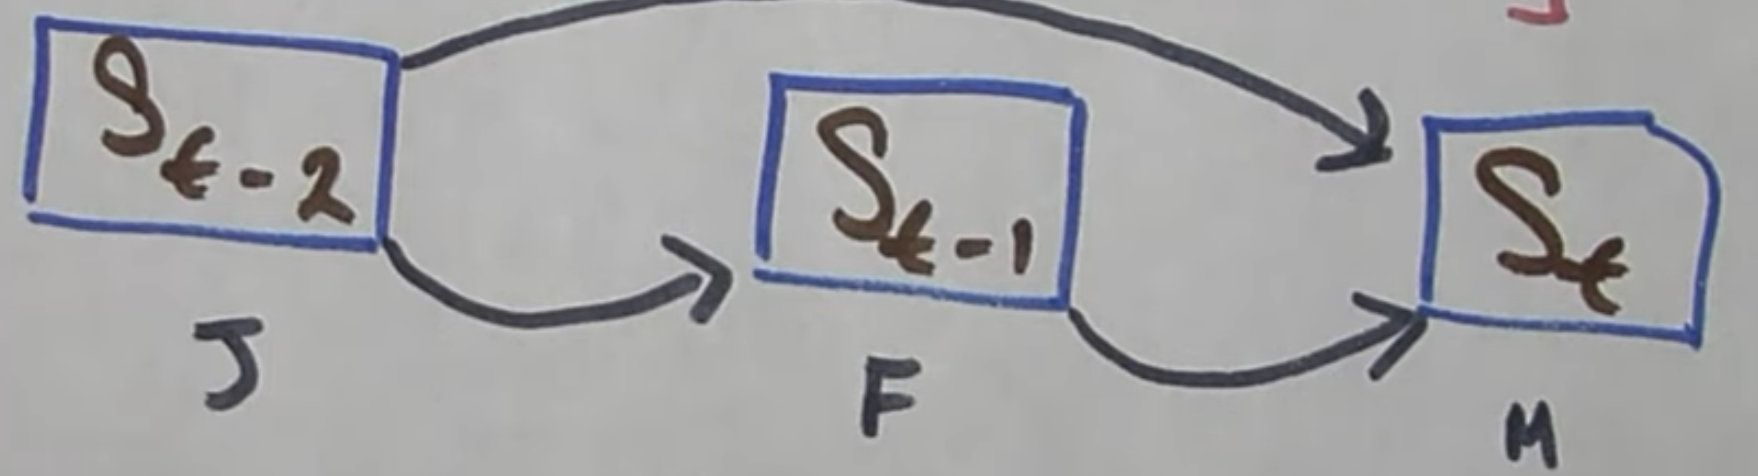

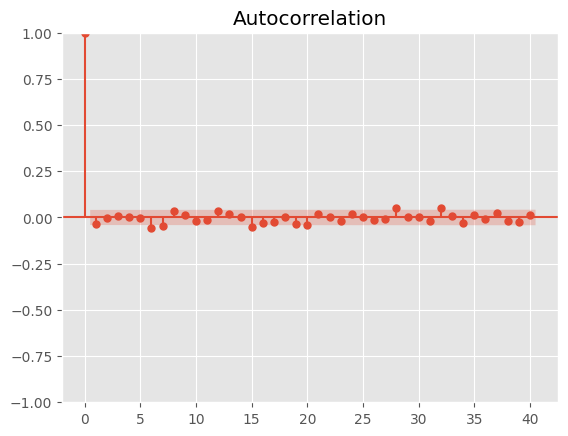

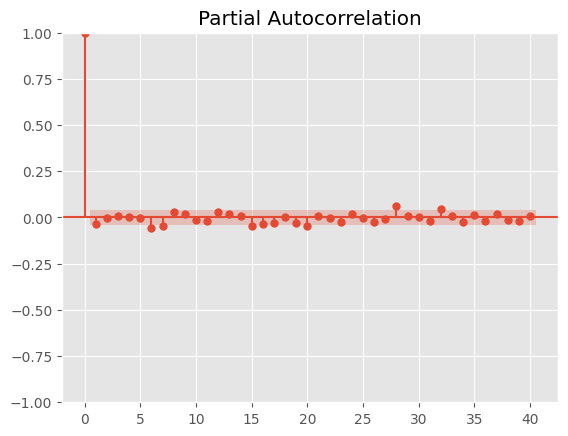

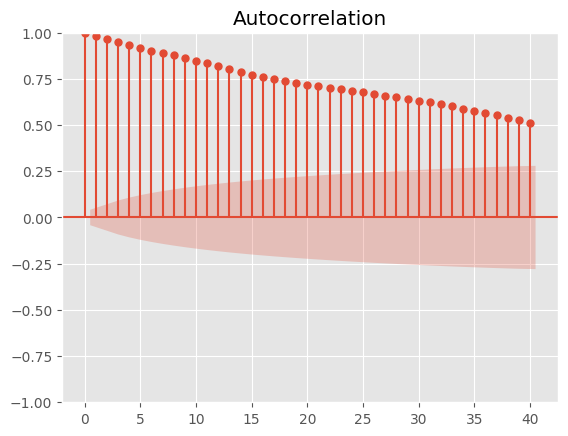

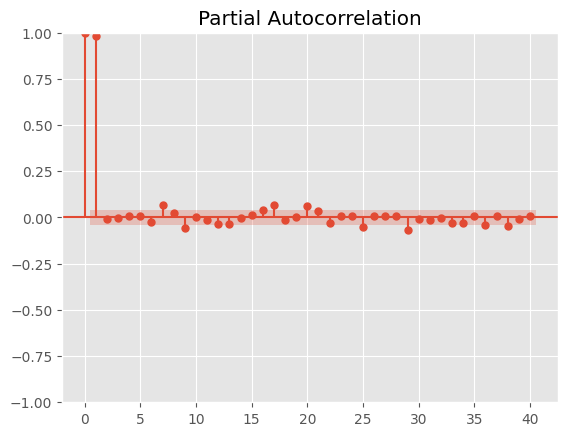

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for non-seasonal components
plot_acf(df['diff'].dropna(), lags=40)
plot_pacf(df['diff'].dropna(), lags=40)
plt.show()

# Plot ACF and PACF for seasonal components (e.g., seasonal differencing for m=365)
plot_acf(df['seasonal_diff'].dropna(), lags=40)
plot_pacf(df['seasonal_diff'].dropna(), lags=40)
plt.show()

Conclusion: non-seasonal component

p (autoregressive order) = 0: There are no significant spikes in the PACF plot, which indicates that there are no meaningful lagged relationships in the data that require autoregressive terms.

q (moving average order) = 0: There are no significant spikes in the ACF plot either, meaning there are no moving average components (lagged error terms) needed for the model.

/var/folders/fd/9hpwwy2551d7nn91lsj9v_0c0000gn/T/ipykernel_37448/2369406342.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df['Close'].resample('M').mean()


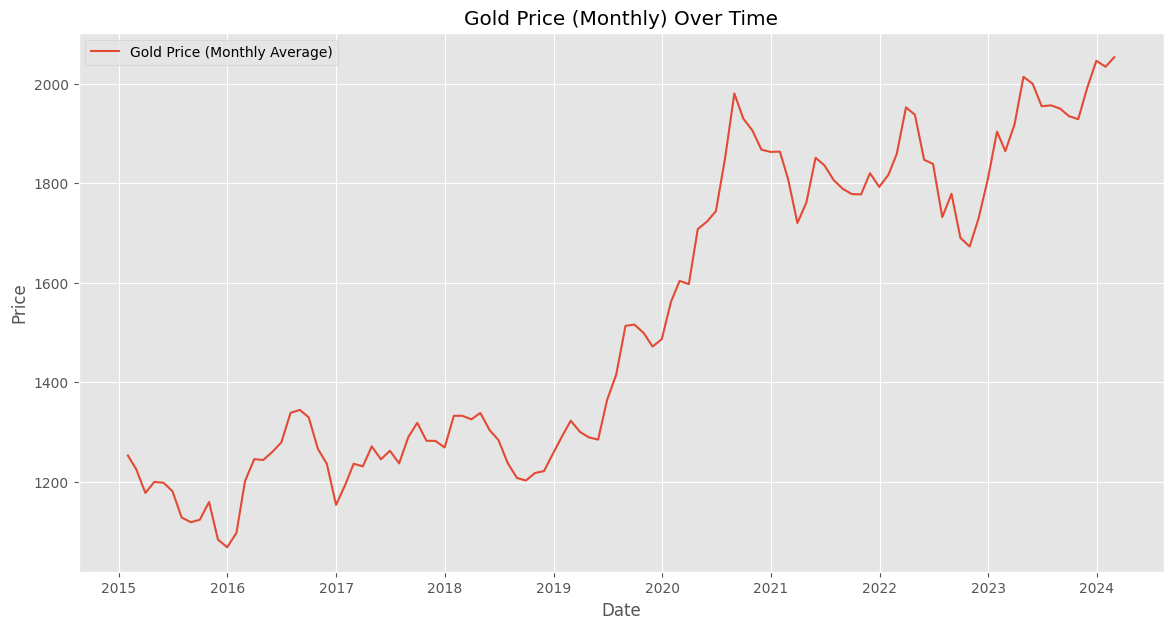

In [34]:
# Convert daily data to monthly data by taking the mean of each month
df_monthly = df['Close'].resample('M').mean()

# Plot the monthly data to visualize the trend
plt.figure(figsize=(14, 7))
plt.plot(df_monthly, label='Gold Price (Monthly Average)')
plt.title('Gold Price (Monthly) Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [35]:
df_monthly.head()

Date
2015-01-31    1253.015000
2015-02-28    1225.484211
2015-03-31    1177.750000
2015-04-30    1199.828571
2015-05-31    1198.075000
Freq: ME, Name: Close, dtype: float64

In [36]:
# Define the split point (e.g., 80% of the data for training)
split_point = int(len(df_monthly) * 0.8)
train = df_monthly[:split_point]
test = df_monthly[split_point:]

# Print the lengths of the train and test sets
print(f"Train set length: {len(train)}")
print(f"Test set length: {len(test)}")


Train set length: 88
Test set length: 22


In [120]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p = 0
d = 1
q = 0
P = 1
D = 1
Q = 1
m = 12

# Fit SARIMA model with gold prices (Close) as the only feature
sarima_model = SARIMAX(train, 
                       order=(p, d, q),  # Non-seasonal ARIMA terms
                       seasonal_order=(P, D, Q, m),  # Seasonal ARIMA terms
                       enforce_stationarity=False,
                       enforce_invertibility=False)

# Fit the model
sarima_results = sarima_model.fit()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.81192D+00    |proj g|=  2.43678D-02

At iterate    5    f=  3.79001D+00    |proj g|=  4.87807D-03

At iterate   10    f=  3.73604D+00    |proj g|=  4.24969D-03

At iterate   15    f=  3.73563D+00    |proj g|=  6.84874D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     19      1     0     0   6.849D-07   3.736D+00
  F =   3.7356349692418935     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


In [121]:
# Print the AIC and BIC values
print("AIC:", sarima_results.aic)
print("BIC:", sarima_results.bic)

# View the summary of the SARIMA model
print(sarima_results.summary())

# Interpret: Look for p-values in the summary output.
# If any p-value is greater than 0.05, consider whether that parameter is necessary.


AIC: 663.4717545865733
BIC: 669.8531577417086
                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                   88
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -328.736
Date:                              Thu, 31 Oct 2024   AIC                            663.472
Time:                                      16:32:28   BIC                            669.853
Sample:                                  01-31-2015   HQIC                           665.977
                                       - 04-30-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0082      0.107     -0.076      0.9

In [122]:
# Forecast the next steps equal to the length of the test set
forecast = sarima_results.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Make sure the forecast index matches the test index
forecast_index = test.index


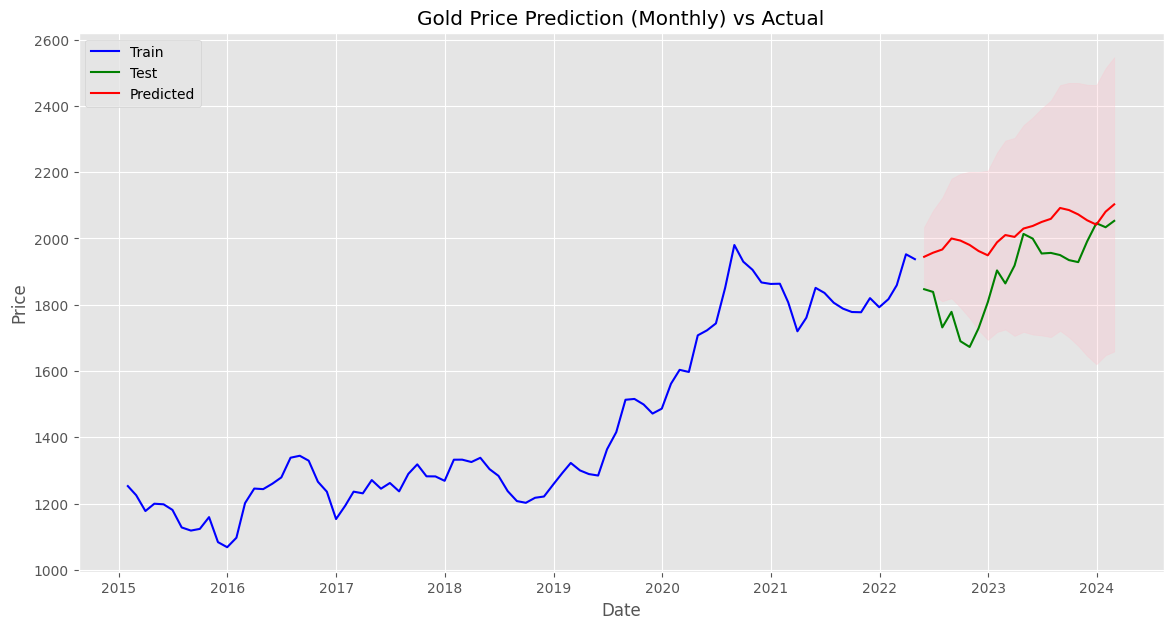

In [123]:
# Plot the training and test data
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Train', color='blue')
plt.plot(test.index, test, label='Test', color='green')

# Plot the predicted prices for the test dates
plt.plot(forecast_index, forecast_mean, label='Predicted', color='red')

# Plot the confidence intervals
plt.fill_between(forecast_index, 
                 forecast_ci.iloc[:, 0], 
                 forecast_ci.iloc[:, 1], 
                 color='pink', alpha=0.3)

# Add labels, title, and legend
plt.title('Gold Price Prediction (Monthly) vs Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


### Read in and process into Inflation rate

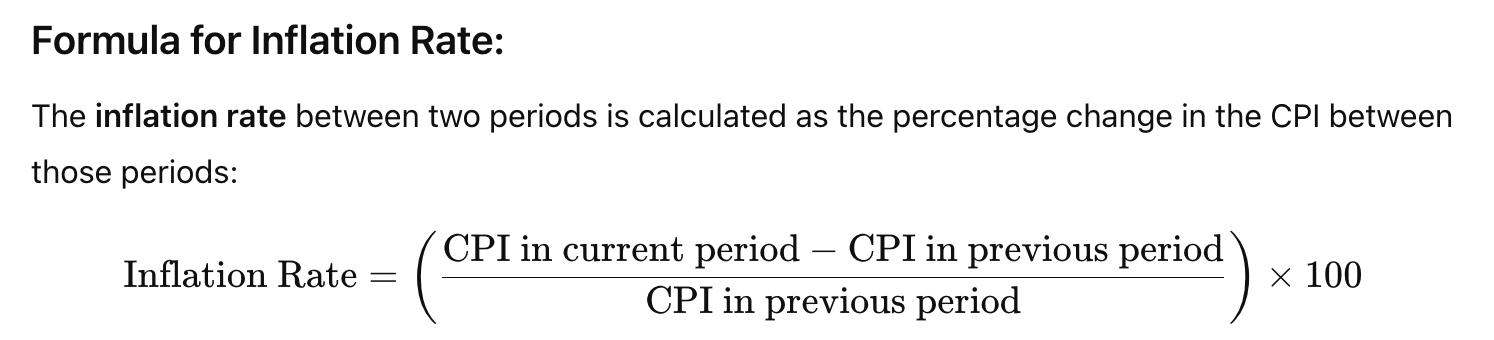

In [40]:
df_inflation = pd.read_csv('CPIAUCSL.csv', parse_dates=['DATE'], index_col='DATE').copy()

In [41]:
#df_inflation['shifted_M'] = df_inflation.CPIAUCSL.shift()
df_inflation['shifted_Y'] = df_inflation.CPIAUCSL.shift(12)

In [42]:
df_inflation.tail()

,CPIAUCSL,shifted_Y
DATE,,
2024-05-01,313.225,303.365
2024-06-01,313.049,304.003
2024-07-01,313.534,304.628
2024-08-01,314.121,306.187
2024-09-01,314.686,307.288


In [43]:
#df_inflation['Monthly_Infl'] = ((df_inflation['CPIAUCSL'] - df_inflation['shifted_M']) / df_inflation['shifted_M']) * 100

In [44]:
df_inflation['YoY_Infl'] = ((df_inflation['CPIAUCSL'] - df_inflation['shifted_Y']) / df_inflation['shifted_Y']) * 100

In [45]:
df_inflation.tail(100)

,CPIAUCSL,shifted_Y,YoY_Infl
DATE,,,
2016-06-01,240.222,237.657,1.079287
2016-07-01,240.101,238.034,0.868363
2016-08-01,240.545,238.033,1.055316
2016-09-01,241.176,237.498,1.548645
2016-10-01,241.741,237.733,1.685925
...,...,...,...
2024-05-01,313.225,303.365,3.250210
2024-06-01,313.049,304.003,2.975629
2024-07-01,313.534,304.628,2.923566


In [46]:
df_inflation_L10 = df_inflation.loc['2010':'2024']
df_inflation_L10.tail(20)

,CPIAUCSL,shifted_Y,YoY_Infl
DATE,,,
2023-02-01,301.509,284.535,5.965523
2023-03-01,301.744,287.553,4.935090
2023-04-01,303.032,288.764,4.941059
2023-05-01,303.365,291.359,4.120690
2023-06-01,304.003,294.996,3.053262
2023-07-01,304.628,294.977,3.271781
2023-08-01,306.187,295.209,3.718721
2023-09-01,307.288,296.341,3.694055
2023-10-01,307.531,297.863,3.245787


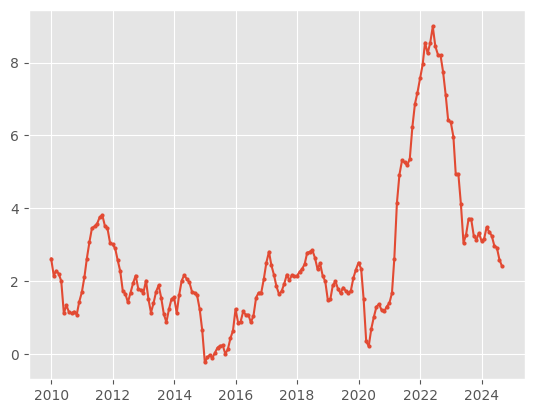

In [47]:
plt.plot(df_inflation_L10.index, df_inflation_L10['YoY_Infl'], marker='o', markersize=2)

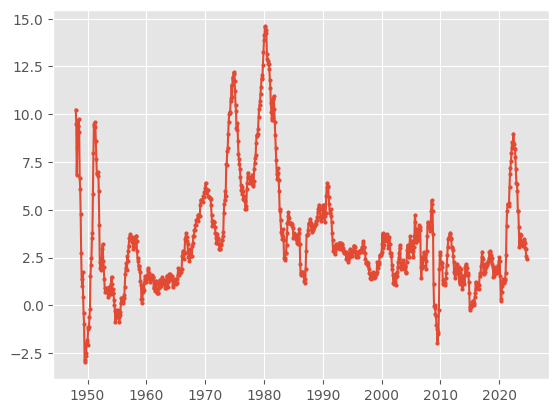

In [48]:
plt.plot(df_inflation.index, df_inflation['YoY_Infl'], marker='o', markersize=2)

In [49]:
# Step 1: Reindex the DataFrame to include all dates between the min and max date (daily frequency)
full_date_range = pd.date_range(start=df_inflation.index.min(), end=df_inflation.index.max(), freq='D')
df_inflation = df_inflation.reindex(full_date_range).copy()

df_inflation['CPIAUCSL'] = df_inflation['CPIAUCSL'].ffill()

In [50]:
df_inflation['shifted_Y'] = df_inflation['shifted_Y'].ffill()
df_inflation['YoY_Infl'] = df_inflation['YoY_Infl'].ffill()

In [51]:
df_inflation_L10['CPIAUCSL'] = df_inflation_L10['CPIAUCSL'].ffill()

In [52]:
df_merged = pd.merge(df_monthly, df_inflation, left_index=True, right_index=True, how='inner').copy()

In [53]:
df_merged.tail()

,Close,CPIAUCSL,shifted_Y,YoY_Infl
2023-10-31,1928.622727,307.531,297.863,3.245787
2023-11-30,1991.190476,308.024,298.648,3.139482
2023-12-31,2046.035000,308.742,298.812,3.323160
2024-01-31,2033.880952,309.685,300.356,3.105981
2024-02-29,2053.116667,311.054,301.509,3.165743


In [54]:
df_merged.shape

(110, 4)

In [55]:
df_merged.isnull().sum()

Close        0
CPIAUCSL     0
shifted_Y    0
YoY_Infl     0
dtype: int64

In [56]:
df_merged.describe()

,Close,CPIAUCSL,shifted_Y,YoY_Infl
count,110.000000,110.000000,110.000000,110.000000
mean,1529.078507,262.662745,255.074536,2.876781
std,307.220052,23.159931,18.499075,2.382978
min,1068.586364,234.747000,234.747000,-0.229931
25%,1254.179671,244.045250,239.133250,1.321986
50%,1443.776136,255.825000,251.438500,2.149324
75%,1831.830357,278.207750,260.733500,3.601331
max,2053.116667,311.054000,301.509000,8.989744


In [128]:
decomposition = seasonal_decompose(df_merged['CPIAUCSL'], model='multiplicative', period=365)
decomposition.plot()
plt.show()

ValueError: x must have 2 complete cycles requires 730 observations. x only has 110 observation(s)

In [58]:
df_merged.head()

,Close,CPIAUCSL,shifted_Y,YoY_Infl
2015-01-31,1253.015000,234.747,235.288,-0.229931
2015-02-28,1225.484211,235.342,235.547,-0.087031
2015-03-31,1177.750000,235.976,236.028,-0.022031
2015-04-30,1199.828571,236.222,236.468,-0.104031
2015-05-31,1198.075000,237.001,236.918,0.035033


## Example with Exogenous Feature (SARIMAX):

If you want to incorporate additional features (e.g., inflation rate, interest rates, USD Index), you would use a variant of SARIMA called SARIMAX (Seasonal ARIMA with eXogenous regressors). SARIMAX allows you to include external (exogenous) variables in addition to the time series itself.


In [59]:
train2 = pd.merge(train, df_inflation, left_index=True, right_index=True, how='inner').copy()
test2 = pd.merge(test, df_inflation, left_index=True, right_index=True, how='inner').copy()

In [60]:
test2.head()

,Close,CPIAUCSL,shifted_Y,YoY_Infl
2022-05-31,1846.976190,291.359,268.452,8.532997
2022-06-30,1838.780952,294.996,270.664,8.989744
2022-07-31,1731.760000,294.977,271.994,8.449819
2022-08-31,1778.647826,295.209,272.789,8.218806
2022-09-30,1690.057143,296.341,273.887,8.198272


In [108]:

p = 0
d = 0
q = 0
P = 1
D = 1
Q = 1
m = 12


# Assuming 'YoY_inflation' is an exogenous feature you want to include in the model

sarimax_model = SARIMAX(train2['Close'], 
                        exog=train2[['YoY_Infl']],  # Include exogenous variable
                        order=(p, d, q), 
                        seasonal_order=(P, D, Q, m), 
                        enforce_stationarity=False,
                        enforce_invertibility=False)

# Fit the model
sarimax_results = sarimax_model.fit()




RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.87714D+00    |proj g|=  2.10736D-01

At iterate    5    f=  4.82282D+00    |proj g|=  4.70906D-03

At iterate   10    f=  4.78308D+00    |proj g|=  3.87853D-02

At iterate   15    f=  4.77837D+00    |proj g|=  7.49828D-04

At iterate   20    f=  4.77261D+00    |proj g|=  9.97781D-03

At iterate   25    f=  4.76650D+00    |proj g|=  4.00795D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     34      1     0     0   

/Users/keikietpham/Documents/Projektkurs_tsForcasting/env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/Users/keikietpham/Documents/Projektkurs_tsForcasting/env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


In [109]:
# Print the AIC and BIC values
print("AIC:", sarimax_results.aic)
print("BIC:", sarimax_results.bic)

# View the summary of the SARIMA model
print(sarimax_results.summary())

# Interpret: Look for p-values in the summary output.
# If any p-value is greater than 0.05, consider whether that parameter is necessary.

AIC: 846.9029620454002
BIC: 855.4755009509663
                                 SARIMAX Results                                  
Dep. Variable:                      Close   No. Observations:                   88
Model:             SARIMAX(1, 1, [1], 12)   Log Likelihood                -419.451
Date:                    Thu, 31 Oct 2024   AIC                            846.903
Time:                            16:29:06   BIC                            855.476
Sample:                        01-31-2015   HQIC                           850.275
                             - 04-30-2022                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
YoY_Infl     -35.0356     17.079     -2.051      0.040     -68.510      -1.561
ar.S.L12       0.4039      0.477      0.846      0.39

In [110]:
# Forecast the next steps equal to the length of the test set
forecast2 = sarimax_results.get_forecast(steps=len(test2), exog=test2[['YoY_Infl']])
forecast2_mean = forecast2.predicted_mean
forecast2_ci = forecast2.conf_int()

# Make sure the forecast index matches the test index
forecast2_index = test2.index


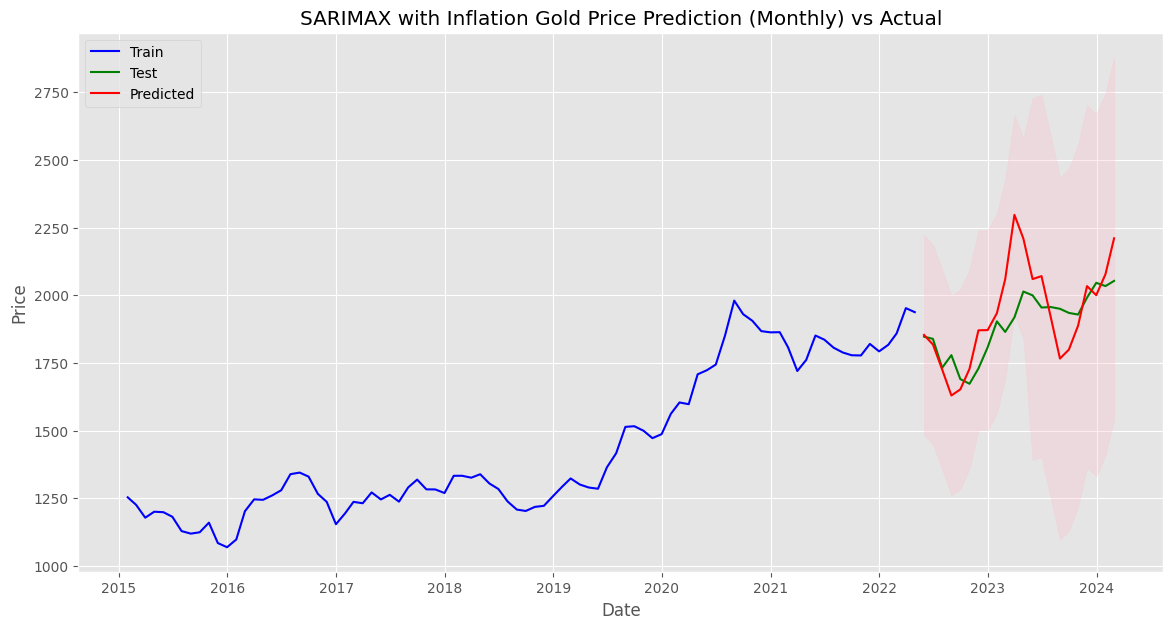

In [111]:
# Plot the training and test data
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Train', color='blue')
plt.plot(test.index, test, label='Test', color='green')

# Plot the predicted prices for the test dates
plt.plot(forecast2_index, forecast2_mean, label='Predicted', color='red')

# Plot the confidence intervals
plt.fill_between(forecast2_index, 
                 forecast2_ci.iloc[:, 0], 
                 forecast2_ci.iloc[:, 1], 
                 color='pink', alpha=0.3)

# Add labels, title, and legend
plt.title('SARIMAX with Inflation Gold Price Prediction (Monthly) vs Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## When to use Lagged Features:

Lagged features are typically used in time series forecasting when you expect that past values of your features or target variable have an influence on the future values of the target variable. This is especially true in cases where there's autocorrelation or delayed effects.

How to Determine the Lags:
Autocorrelation: If gold prices (or any other variable) show strong autocorrelation, this suggests that past values influence current and future values, and you should include lagged features.

Autocorrelation Function (ACF): This measures how correlated the current value is with its previous values. You can plot the ACF to help determine how many lags to include.

If the ACF plot shows significant correlations (peaks) at lag 1, 2, or more, those are good candidates for inclusion as lagged features.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot autocorrelation of the gold prices
plot_acf(df_merged['Close'], lags=30)
plt.show()
